In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.patches as mpatches
import seaborn as sns
import ast

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('P2X_Models_Metrics.csv')

# Display the first few rows of the DataFrame
df.head()

,iptm,ptm,ranking_score,fraction_disordered,has_clash,num_recycles,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,first_subunit,second_subunit,third_subunit,structure_type
0,0.74,0.74,0.82,0.18,0.0,10.0,"[0.7, 0.75, 0.72]","[[0.62, 0.73, 0.66], [0.73, 0.73, 0.77], [0.66...","[[0.76, 2.28, 2.35], [2.39, 0.76, 2.31], [2.28...","[0.62, 0.73, 0.65]",p2x2,p2x4,p2x7,complete
1,0.74,0.75,0.80,0.12,0.0,10.0,"[0.73, 0.72, 0.72]","[[0.68, 0.73, 0.73], [0.73, 0.66, 0.71], [0.73...","[[0.76, 2.53, 2.69], [2.23, 0.76, 2.49], [2.77...","[0.68, 0.66, 0.65]",p2x1,p2x7,p2x7,complete
2,0.79,0.81,0.83,0.06,0.0,10.0,"[0.76, 0.75, 0.76]","[[0.76, 0.76, 0.76], [0.76, 0.76, 0.75], [0.76...","[[0.76, 2.45, 2.28], [2.68, 0.76, 2.29], [2.57...","[0.76, 0.76, 0.75]",p2x3,p2x4,p2x7,trimmed
3,0.78,0.80,0.82,0.07,0.0,10.0,"[0.75, 0.75, 0.75]","[[0.75, 0.75, 0.76], [0.75, 0.75, 0.74], [0.76...","[[0.76, 2.48, 2.44], [2.42, 0.76, 2.44], [2.58...","[0.75, 0.75, 0.75]",p2x2,p2x2,p2x7,trimmed
4,0.76,0.78,0.80,0.07,0.0,10.0,"[0.72, 0.72, 0.72]","[[0.74, 0.71, 0.72], [0.71, 0.74, 0.72], [0.72...","[[0.76, 2.95, 2.81], [2.51, 0.76, 3.05], [3.14...","[0.74, 0.74, 0.73]",p2x5,p2x5,p2x6,trimmed


In [3]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,iptm,ptm,ranking_score,fraction_disordered,has_clash,num_recycles
count,168.000000,168.000000,168.000000,168.000000,168.0,168.0
mean,0.756786,0.771607,0.823214,0.127381,0.0,10.0
std,0.036383,0.039885,0.021978,0.069534,0.0,0.0
min,0.670000,0.680000,0.760000,0.050000,0.0,10.0
25%,0.730000,0.740000,0.810000,0.070000,0.0,10.0
50%,0.760000,0.780000,0.820000,0.085000,0.0,10.0
75%,0.780000,0.800000,0.840000,0.190000,0.0,10.0
max,0.860000,0.870000,0.900000,0.300000,0.0,10.0


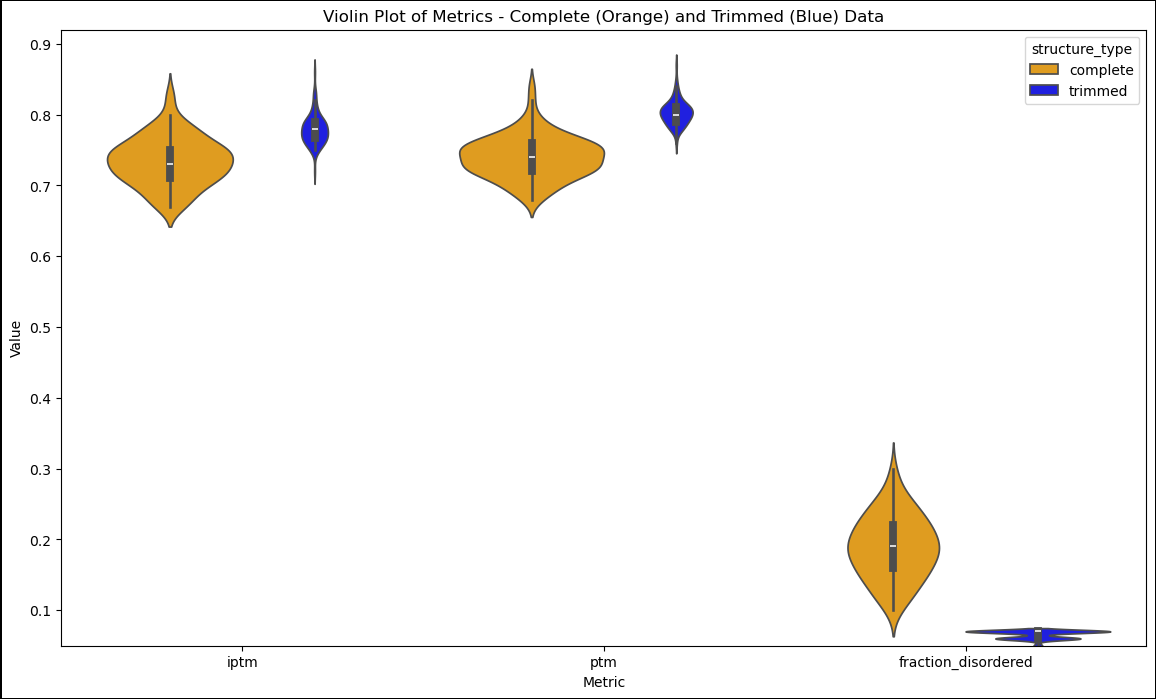

In [4]:
# Convert string representations of lists into actual lists
for col in ['chain_iptm', 'chain_pair_iptm', 'chain_pair_pae_min', 'chain_ptm']:
    df[col] = df[col].apply(ast.literal_eval)

# Select metrics for plotting
metrics = ['iptm', 'ptm', 'fraction_disordered']

# Melt the dataframe
melted = df.melt(id_vars=['structure_type'], value_vars=metrics, var_name='Metric', value_name='Value')

# Determine the y-axis range
y_min = melted['Value'].min()
y_max = melted['Value'].max()+0.05

# Create violin plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.violinplot(x='Metric', y='Value', hue='structure_type', data=melted, palette={'complete': 'orange', 'trimmed': 'blue'}, ax=ax)
plt.ylim(y_min, y_max)
plt.title('Violin Plot of Metrics - Complete (Orange) and Trimmed (Blue) Data')

# Add a border to the entire figure
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

# Save the plot as a PNG file with a border
plt.savefig('violin_plot_with_border.png', dpi=300, bbox_inches='tight', edgecolor='black', facecolor='white')

# Display the plot
plt.show()

/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


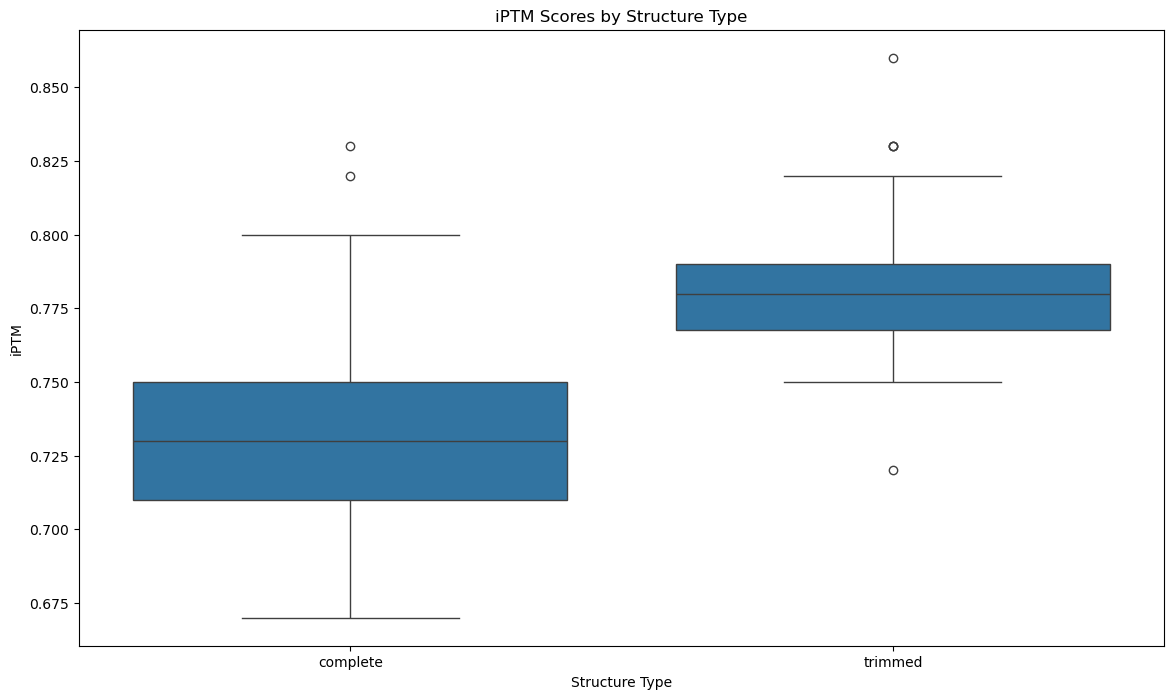

/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


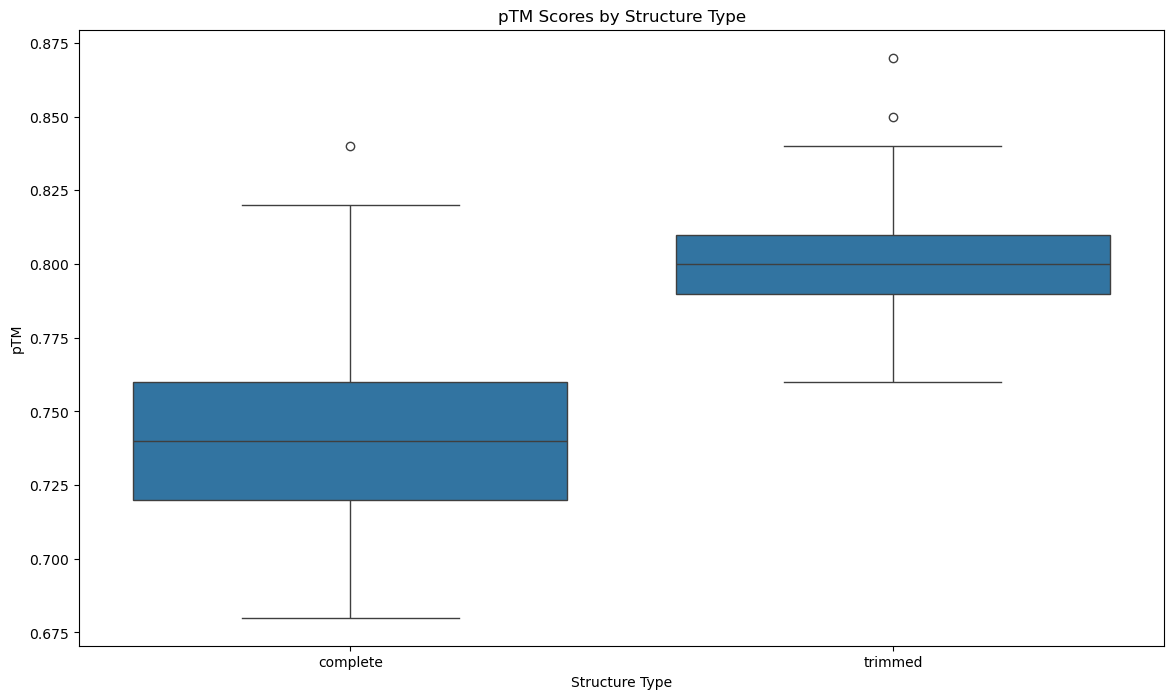

In [5]:
# Boxplots for comparing metrics across subunits and structure types
plt.figure(figsize=(14, 8))
sns.boxplot(x='structure_type', y='iptm', data=df)
plt.title('iPTM Scores by Structure Type')
plt.xlabel('Structure Type')
plt.ylabel('iPTM')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='structure_type', y='ptm', data=df)
plt.title('pTM Scores by Structure Type')
plt.xlabel('Structure Type')
plt.ylabel('pTM')
plt.show()

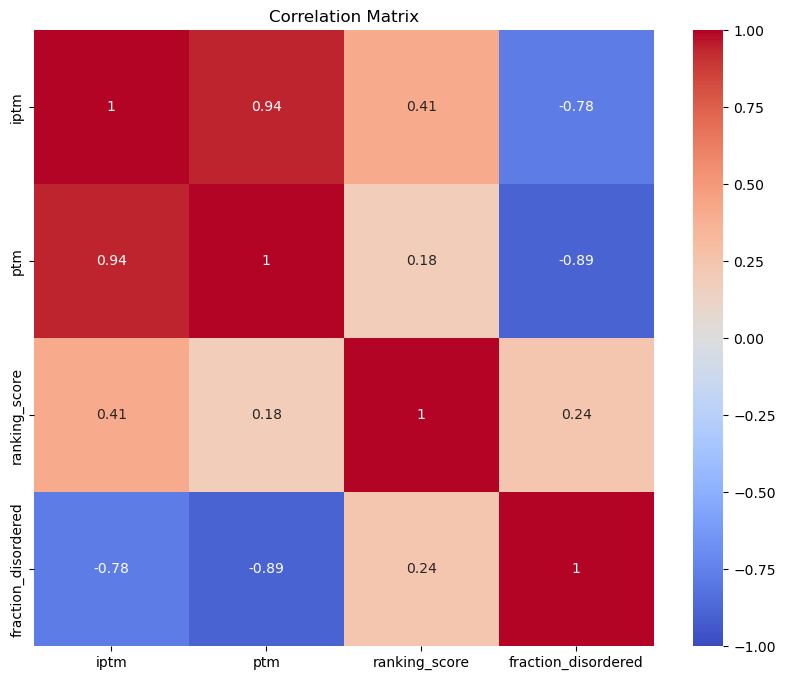

In [6]:
# Compute the correlation matrix
corr_matrix = df[['iptm', 'ptm', 'ranking_score', 'fraction_disordered']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


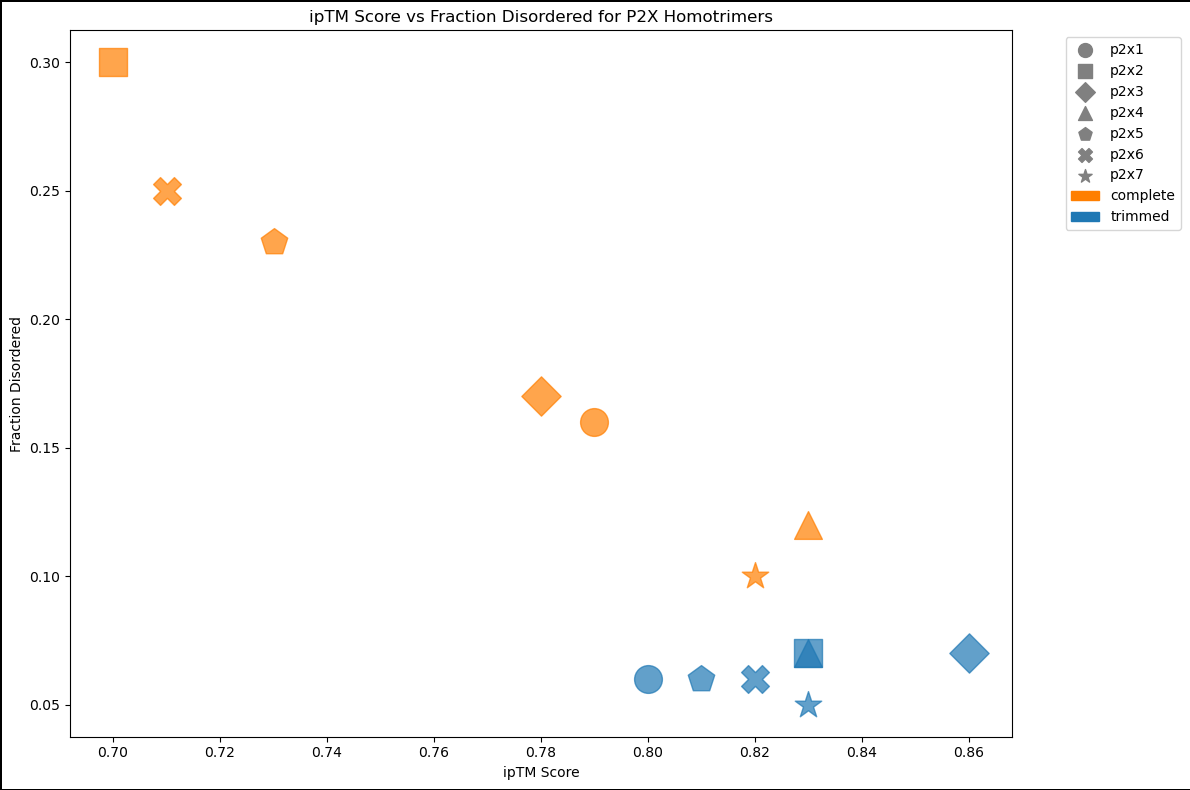

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Filter for homotrimers
homotrimers = df[(df['first_subunit'] == df['second_subunit']) & 
                 (df['second_subunit'] == df['third_subunit'])]

# Define shapes, colors, and marker sizes for each P2X subtype and structure type
shapes = {'p2x1': 'o', 'p2x2': 's', 'p2x3': 'D', 'p2x4': '^', 
          'p2x5': 'p', 'p2x6': 'X', 'p2x7': '*'}
colors = {'complete': '#ff7f00', 'trimmed': '#1f78b4'}
marker_sizes = {'complete': 400, 'trimmed': 400}

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data points without labels
for subunit in shapes.keys():
    for structure in colors.keys():
        data = homotrimers[(homotrimers['first_subunit'] == subunit) & 
                           (homotrimers['structure_type'] == structure)]
        ax.scatter(data['iptm'], data['fraction_disordered'], 
                   marker=shapes[subunit], c=colors[structure], 
                   s=marker_sizes[structure], alpha=0.7)

# Create custom legend handles
shape_handles = [plt.scatter([], [], marker=shape, color='gray', s=100, label=subunit) 
                 for subunit, shape in shapes.items()]
color_handles = [mpatches.Patch(color=color, label=structure) 
                 for structure, color in colors.items()]

# Combine handles and labels
all_handles = shape_handles + color_handles
all_labels = list(shapes.keys()) + list(colors.keys())

ax.set_title('ipTM Score vs Fraction Disordered for P2X Homotrimers')
ax.set_xlabel('ipTM Score')
ax.set_ylabel('Fraction Disordered')

# Create the legend
ax.legend(handles=all_handles, labels=all_labels, 
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a border to the entire figure
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

plt.tight_layout()

# Save the figure with border as PNG
plt.savefig('p2x_homotrimers_plot_with_border.png', dpi=300, bbox_inches='tight', 
            edgecolor='black', facecolor='white')

# Display the plot
plt.show()

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


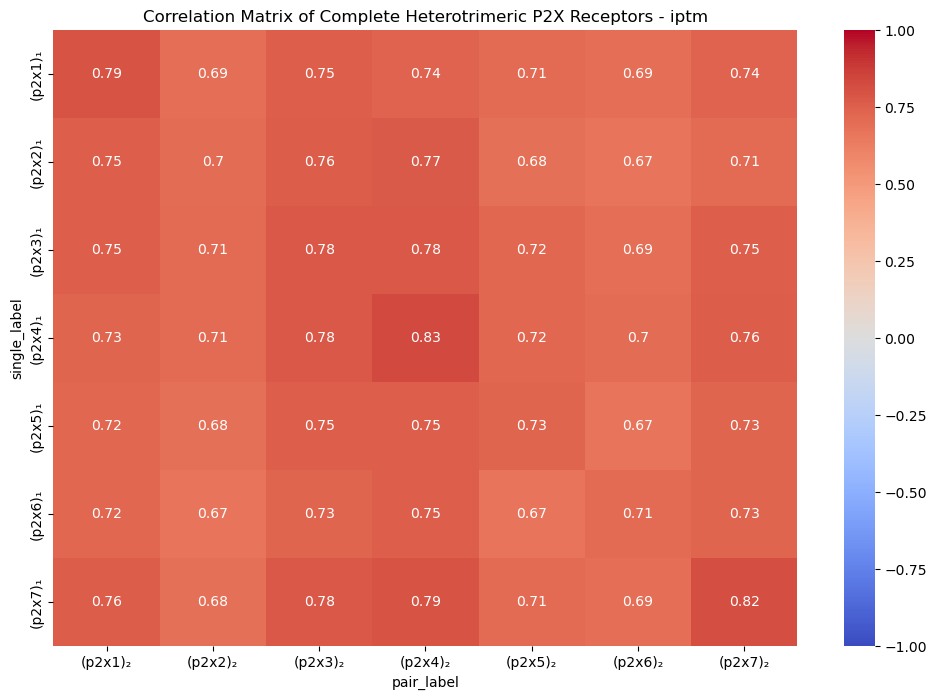

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


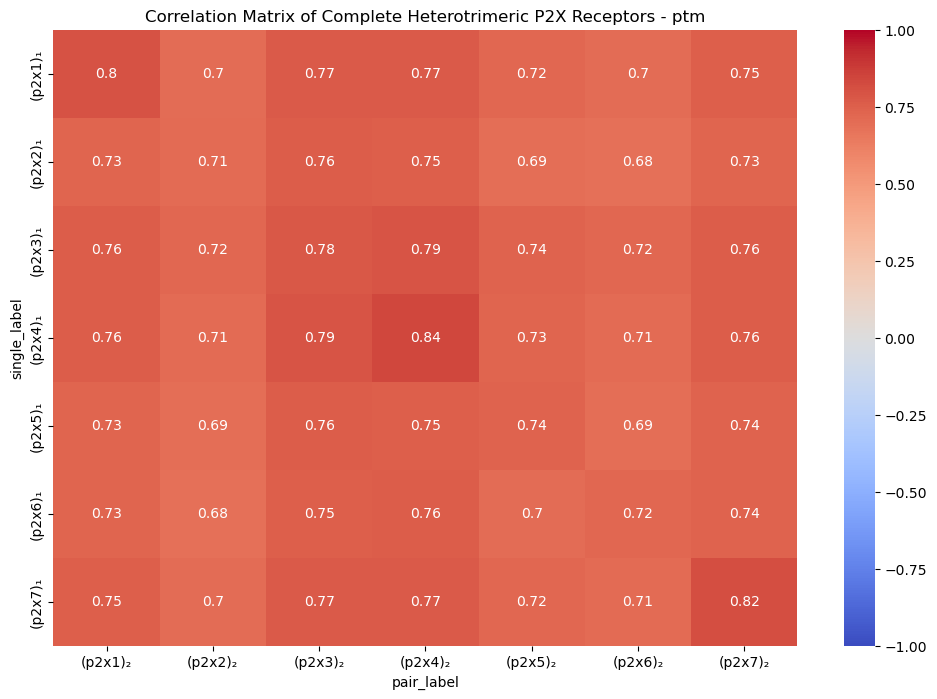

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


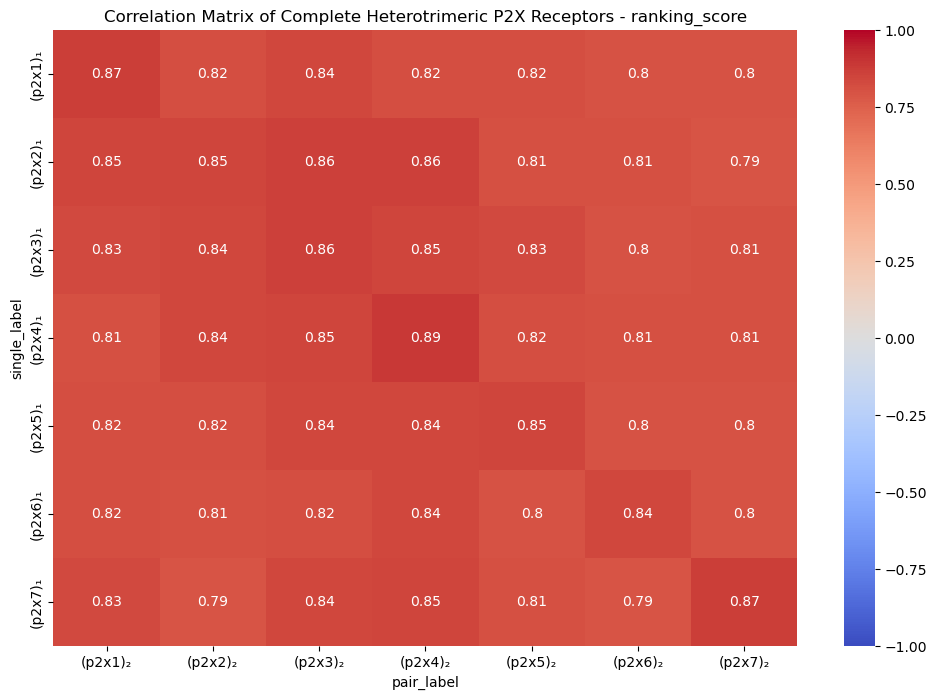

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


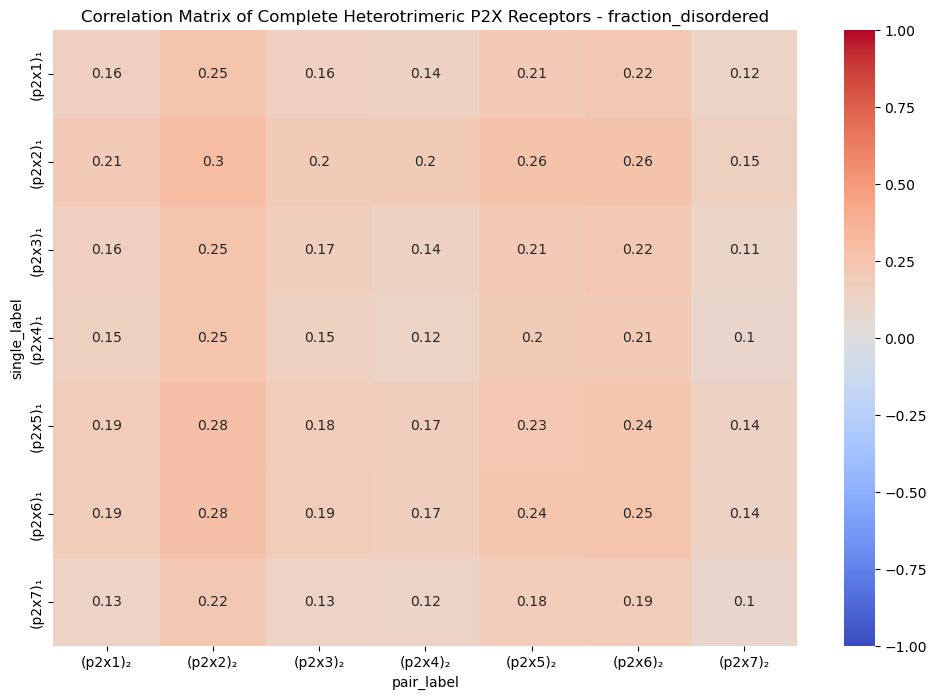

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the Data
# Only include rows with heterotrimeric combinations (e.g., P2X1, P2X2, P2X1)
heterotrimers = df[
    (df['first_subunit'] == df['second_subunit']) | 
    (df['second_subunit'] == df['third_subunit']) | 
    (df['first_subunit'] == df['third_subunit'])
]

# Exclude combinations with three different subunits
heterotrimers = heterotrimers[
    (heterotrimers['first_subunit'] == heterotrimers['second_subunit']) |
    (heterotrimers['second_subunit'] == heterotrimers['third_subunit'])
]

# Separate the data into 'complete' and 'trimmed' subsets
complete_data = heterotrimers[heterotrimers['structure_type'] == 'complete']
trimmed_data = heterotrimers[heterotrimers['structure_type'] == 'trimmed']

# Function to create and plot correlation matrix
def plot_correlation_matrix(data, metric, structure_type):
    data['pair_label'] = data.apply(
        lambda row: f"({row['first_subunit']})₂" if row['first_subunit'] == row['second_subunit'] else f"({row['second_subunit']})₂",
        axis=1
    )
    data['single_label'] = data.apply(
        lambda row: f"({row['third_subunit']})₁" if row['first_subunit'] == row['second_subunit'] else f"({row['first_subunit']})₁",
        axis=1
    )
    
    correlation_data = data.pivot_table(
        index='single_label', 
        columns='pair_label', 
        values=metric,
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix of {structure_type.capitalize()} Heterotrimeric P2X Receptors - {metric}')
    plt.show()

# Metrics to plot
metrics = ['iptm', 'ptm', 'ranking_score', 'fraction_disordered']

# Plot for 'complete' data
for metric in metrics:
    plot_correlation_matrix(complete_data, metric, 'complete')

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


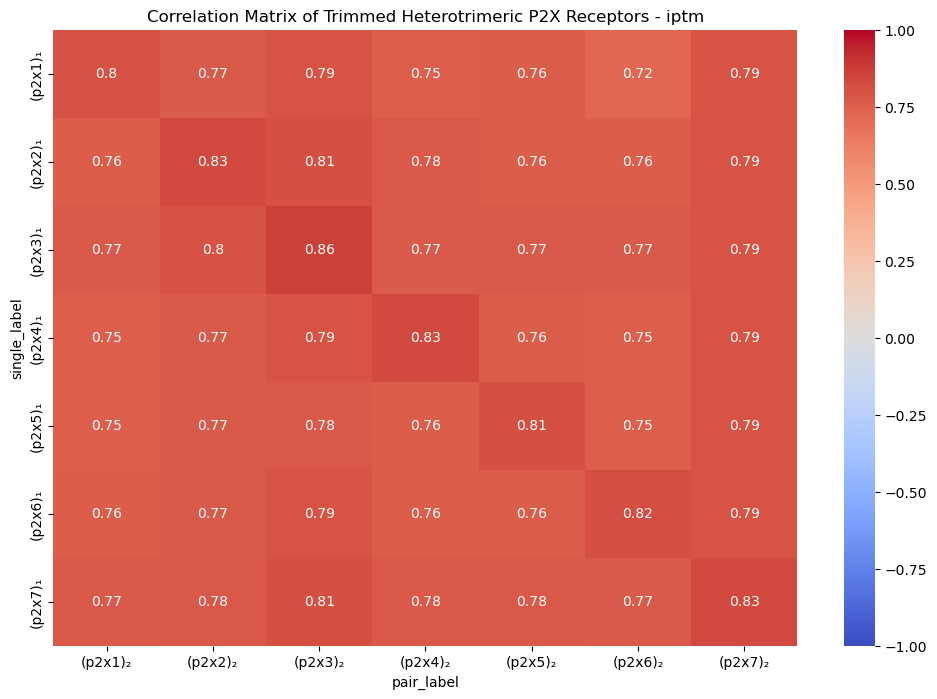

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


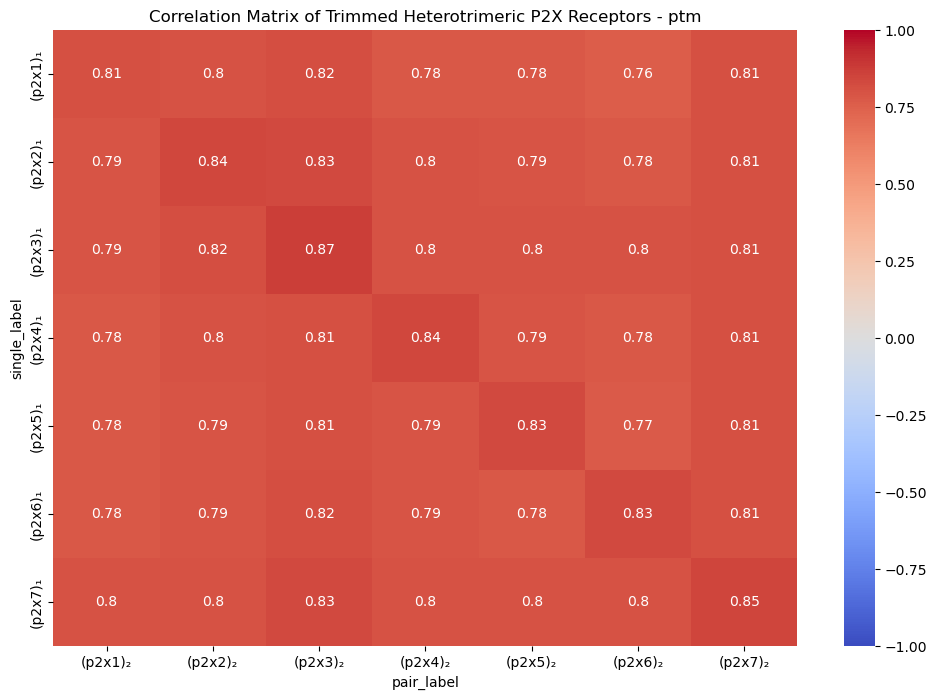

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


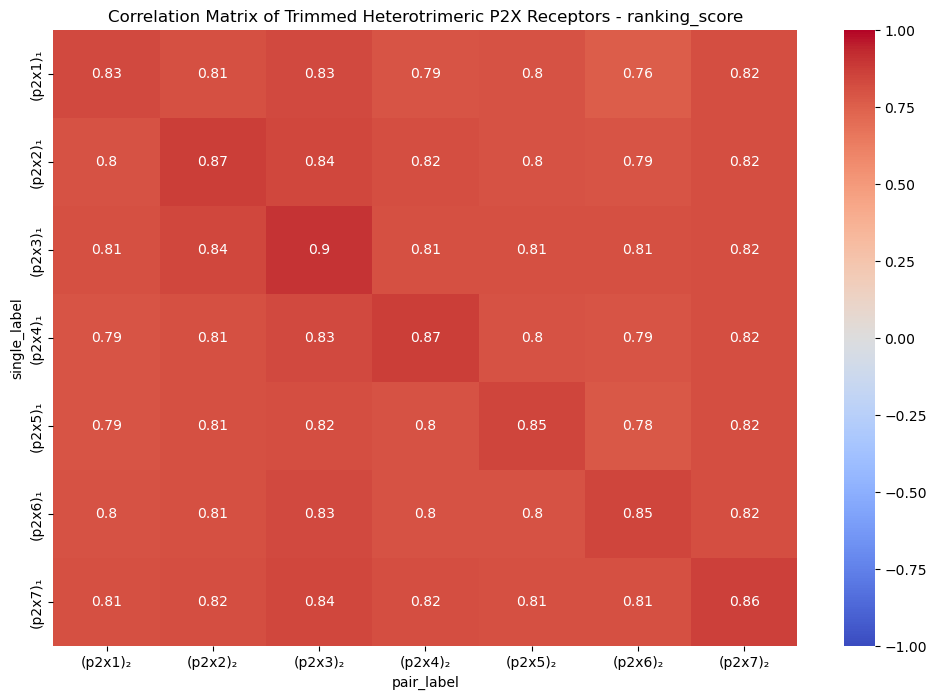

/tmp/ipykernel_95702/2546872343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pair_label'] = data.apply(
/tmp/ipykernel_95702/2546872343.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_label'] = data.apply(


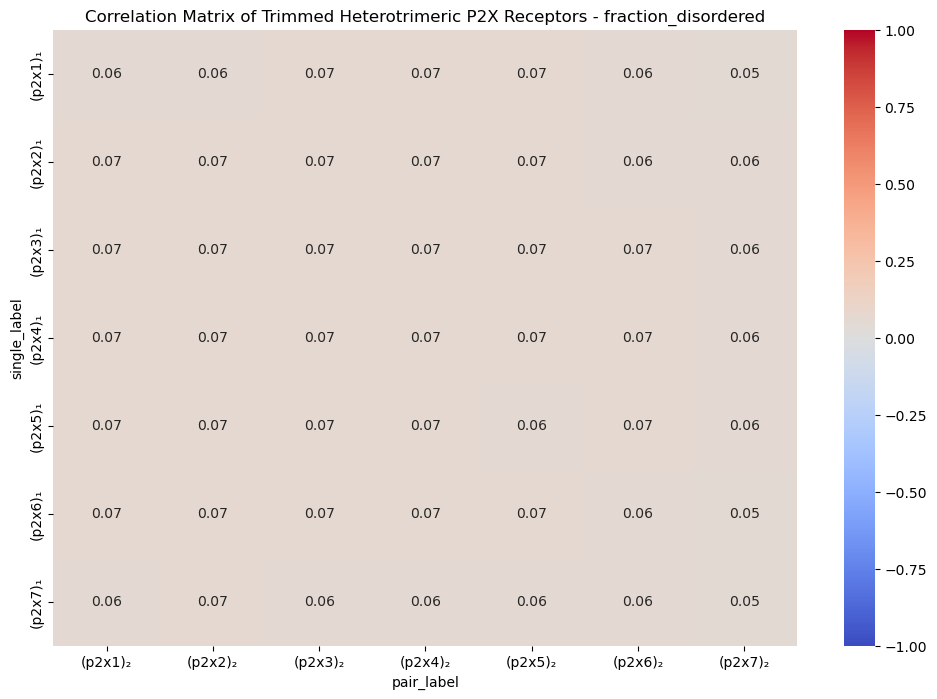

In [9]:
# Plot for 'trimmed' data
for metric in metrics:
    plot_correlation_matrix(trimmed_data, metric, 'trimmed')


/tmp/ipykernel_95702/1791484028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data['combination'] = complete_data.apply(create_combination_label, axis=1)
/tmp/ipykernel_95702/1791484028.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['combination'] = trimmed_data.apply(create_combination_label, axis=1)
/tmp/ipykernel_95702/1791484028.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hu

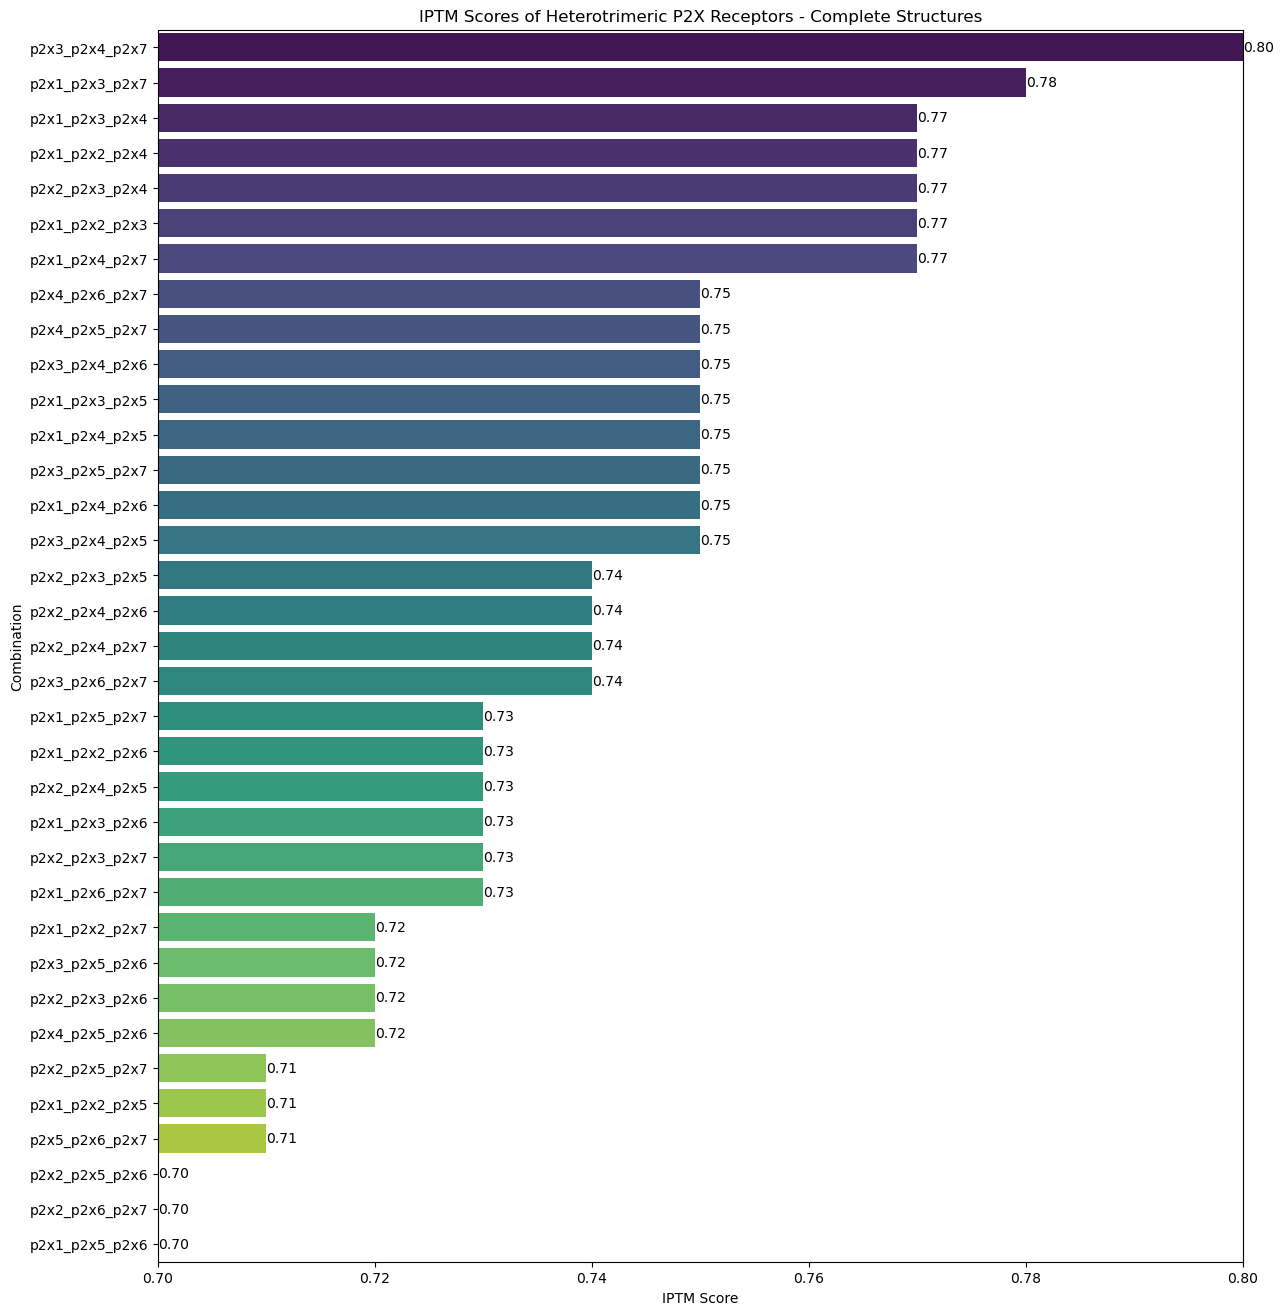

/tmp/ipykernel_95702/1791484028.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='iptm', y='combination', data=data, palette='viridis')
/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/_ba

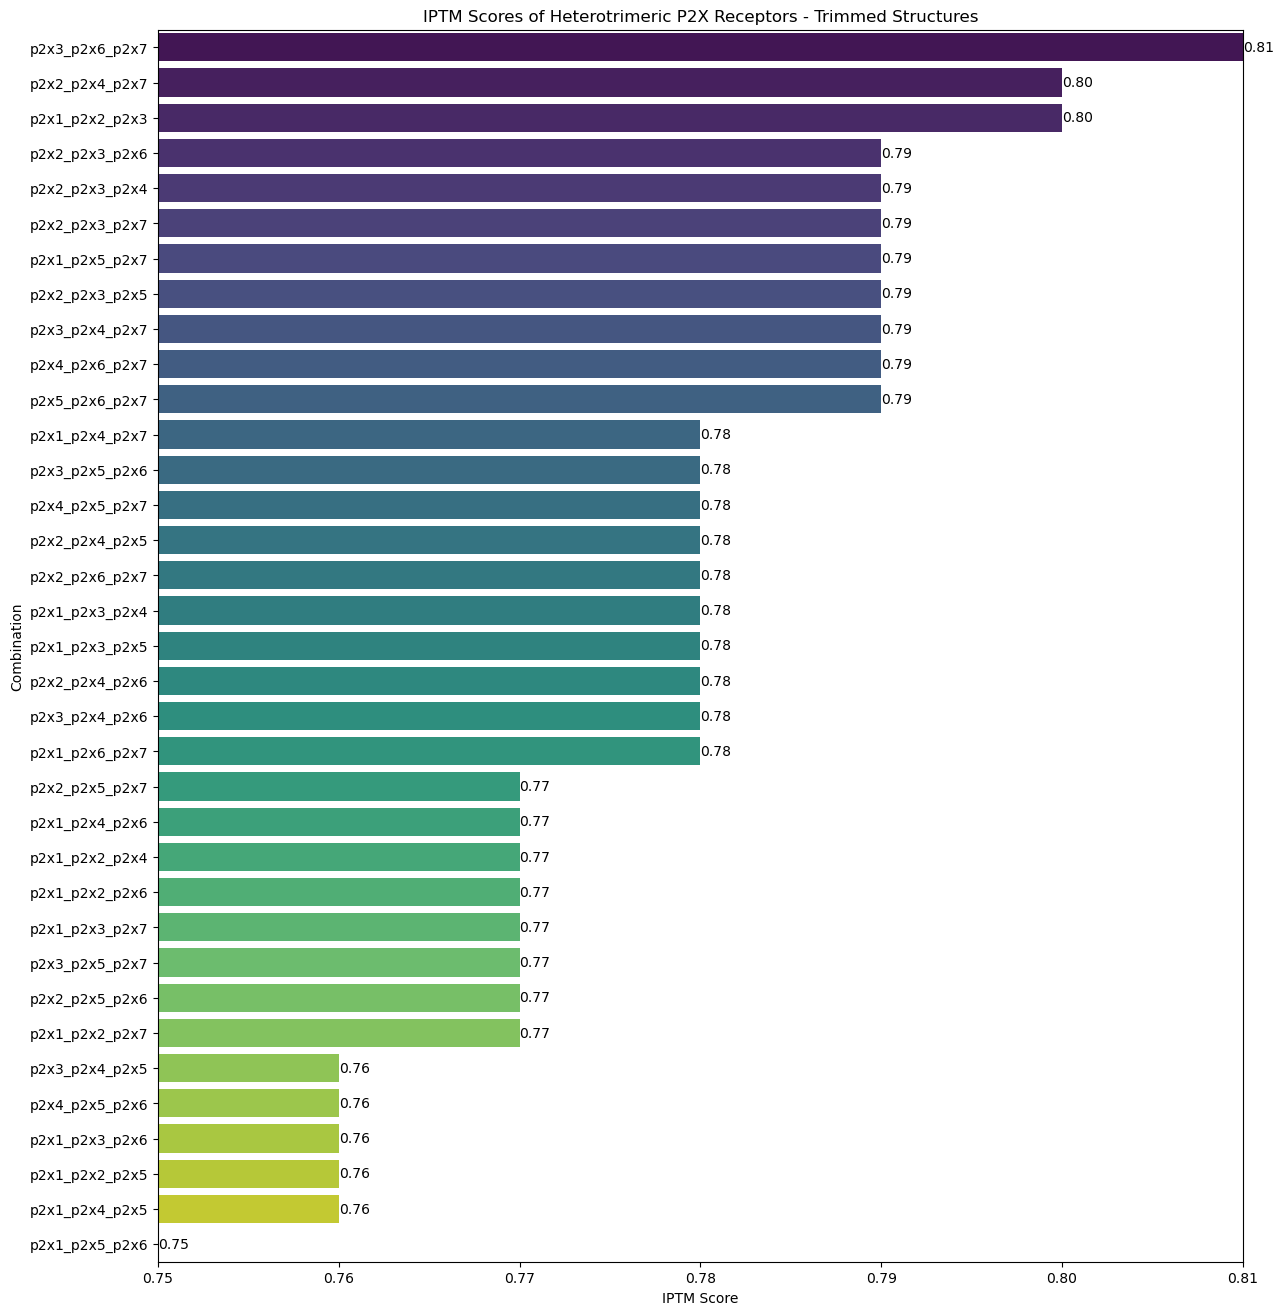

In [10]:
# Function to create labels for combinations
def create_combination_label(row):
    return f"{row['first_subunit']}_{row['second_subunit']}_{row['third_subunit']}"

# Filter data for complete and trimmed structures
complete_data = df[df['structure_type'] == 'complete']
trimmed_data = df[df['structure_type'] == 'trimmed']

# Add combination labels
complete_data['combination'] = complete_data.apply(create_combination_label, axis=1)
trimmed_data['combination'] = trimmed_data.apply(create_combination_label, axis=1)

# Function to filter data to only include combinations with three different subunits
def filter_heterotrimers(data):
    return data[(data['first_subunit'] != data['second_subunit']) & 
                (data['first_subunit'] != data['third_subunit']) & 
                (data['second_subunit'] != data['third_subunit'])]

# Filtered data
filtered_complete_data = filter_heterotrimers(complete_data)
filtered_trimmed_data = filter_heterotrimers(trimmed_data)

# Sorting data by iptm score from highest to lowest
filtered_complete_data = filtered_complete_data.sort_values(by='iptm', ascending=False)
filtered_trimmed_data = filtered_trimmed_data.sort_values(by='iptm', ascending=False)

# Plotting function
def plot_iptm_scores(data, structure_type):
    plt.figure(figsize=(14, 16))  # Increase the height of the plot
    ax = sns.barplot(x='iptm', y='combination', data=data, palette='viridis')
    plt.title(f'IPTM Scores of Heterotrimeric P2X Receptors - {structure_type.capitalize()} Structures')
    plt.xlabel('IPTM Score')
    plt.ylabel('Combination')
    
    # Set the x-axis limits to the min and max of the data
    min_iptm = data['iptm'].min()
    max_iptm = data['iptm'].max()
    plt.xlim(min_iptm, max_iptm)
    
    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
    
    plt.show()

# Plot iptm scores for complete structures
plot_iptm_scores(filtered_complete_data, 'complete')

# Plot iptm scores for trimmed structures
plot_iptm_scores(filtered_trimmed_data, 'trimmed')